# Data Mining And Machine Learning For IOT Applications In Industry at SAIL, Bokaro, India - Linear Regression

The contents of this notebook are taken (and modified) from the COMP90051 course (workshop) at the University of Melbourne, Australia.



## Part A: Simple Linear regression

***

The aim of this part of the workshop is to get you coding linear regression models in Python, relying on the `numpy` library. We will do it in three ways: One based on approximate iterative updates (coordinate descenet), second based on linear algebra (Normal equations), and third based on `sklearn`. The correctness of the first two implementations (from scratch) will be verified by comparing their ouputs to the output of `sklearn`.


Firstly, we will import the relevant libraries (`numpy`, `matplotlib`, etc.).

In [201]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import io

To check what a command does simply type `object?`. For example:

In [202]:
np.random.randn?

### 1. Review
In the lecture, we saw that a linear model can be expressed as:
$$y = w_0 + \sum_{j = 1}^{d} w_j x_j = \mathbf{w} \cdot \mathbf{x} $$
where 

* $y$ is the *response or target variable*;
* $\mathbf{x} = [x_1, \ldots, x_d]$ is a vector of *features* (we define $x_0 = 1$); and
* $\mathbf{w} = [w_0, \ldots, w_d]$ are the *weights*.

To fit the model, we *minimise* the sum of squared residuals (errors), SSR:

$$SSR(\mathbf{w}) = \sum_{i=1}^{n}(y^{(i)} - \mathbf{w} \cdot \mathbf{x}^{(i)})^2$$

**Note:** For simplicity, we'll consider the case $d = 1$ (i.e. only one feature excluding the intercept).

### 2. Data set
We'll be working with some data from the Olympics—the gold medal race times for marathon winners from 1896 to 2012. The code block below reads the data into a numpy array of floats, and prints the result.

In [203]:
# CSV file with variables YEAR,TIME
csv = """1896,4.47083333333333
1900,4.46472925981123
1904,5.22208333333333
1908,4.1546786744085
1912,3.90331674958541
1920,3.5695126705653
1924,3.8245447722874
1928,3.62483706600308
1932,3.59284275388079
1936,3.53880791562981
1948,3.6701030927835
1952,3.39029110874116
1956,3.43642611683849
1960,3.2058300746534
1964,3.13275664573212
1968,3.32819844373346
1972,3.13583757949204
1976,3.07895880238575
1980,3.10581822490816
1984,3.06552909112454
1988,3.09357348817
1992,3.16111703598373
1996,3.14255243512264
2000,3.08527866650867
2004,3.1026582928467
2008,2.99877552632618
2012,3.03392977050993"""

# Read into a numpy array (as floats)
olympics = np.genfromtxt(io.BytesIO(csv.encode()), delimiter=",")
print(olympics)

[[1896.            4.47083333]
 [1900.            4.46472926]
 [1904.            5.22208333]
 [1908.            4.15467867]
 [1912.            3.90331675]
 [1920.            3.56951267]
 [1924.            3.82454477]
 [1928.            3.62483707]
 [1932.            3.59284275]
 [1936.            3.53880792]
 [1948.            3.67010309]
 [1952.            3.39029111]
 [1956.            3.43642612]
 [1960.            3.20583007]
 [1964.            3.13275665]
 [1968.            3.32819844]
 [1972.            3.13583758]
 [1976.            3.0789588 ]
 [1980.            3.10581822]
 [1984.            3.06552909]
 [1988.            3.09357349]
 [1992.            3.16111704]
 [1996.            3.14255244]
 [2000.            3.08527867]
 [2004.            3.10265829]
 [2008.            2.99877553]
 [2012.            3.03392977]]


This loads the data into numpy array. We'll take the race time as the *target variable* $y$ and the year of the race as the only *feature* $x = x_1$.

In [204]:
x = olympics[:, 0:1]
y = olympics[:, 1:2]

And you can make a plot of $y$ vs $x$ with the following commands. Can a linear model be a decent fit for this data?

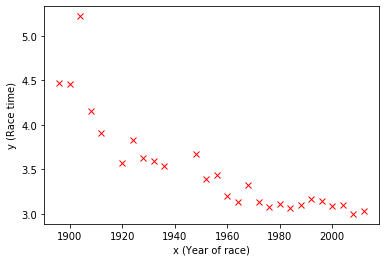

In [205]:
plt.plot(x, y, 'rx')
plt.ylabel("y (Race time)")
plt.xlabel("x (Year of race)")
plt.show()

### 3. Approximate Iterative solution (coordinate descent)

Expanding out the sum of square residuals for this simple case (where $\mathbf{w}=[w_0, w_1]$) we have:
$$SSR(w_0, w_1) = \sum_{i=1}^{n}(y_i - w_0 - w_1 x_i)^2$$
Let's start with an initial guess for the slope $w_1$ (which is clearly negative from the plot).

In [206]:
w1 = -0.4

Then using the maximum likelihood update, we get the following estimate for the intercept $w_0$:
$$w_0 = \frac{\sum_{i=1}^{n}(y_i-w_1 x_i)}{n}$$

In [207]:
w0 = (y - w1*x).mean()
print(w0)

786.0197711453593


Similarly, we can update $w_1$ based on this new estimate of $w_0$:
$$w_1 = \frac{\sum_{i=1}^{n} (y_i - w_0) \times x_i}{\sum_{i=1}^{n} x_i^2}$$

In [208]:
w1 = ((y - w0)*x).sum()/(x**2).sum()
print(w1)

-0.3998724072997095


Let's examine the quality of fit for these values for the weights $w_0$ and $w_1$. First, we create a vector of "test" values `x_test`.

In [209]:
#x_test = np.arange(1890, 2020)[:, None]
x_test = np.arange(0, 15)[:, None]

then, use this vector to compute some test predictions

In [210]:
y_test = w0 + w1 * x_test

Now plot the test predictions with a blue line on the same plot as the data.

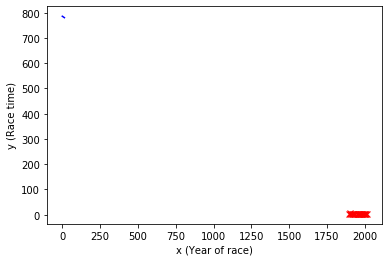

In [211]:
def plot_fit(x_test, y_test, x, y): 
    plt.plot(x_test, y_test, 'b-')
    plt.plot(x, y, 'rx')
    plt.ylabel("y (Race time)")
    plt.xlabel("x (Year of race)")
    plt.show()

plot_fit(x_test, y_test, x, y)

Next, we compute the quality of the fit by evaluating the average sum of squares error of the prediction over the training samples, $SSR(w_0,w_1)$

In [212]:
def compute_SSR(x, y, w0, w1): 
    return ((y - w0 - w1*x)**2).sum()

print(compute_SSR(x, y, w0, w1))

5104.580163103217


It's obvious from the plot that the fit isn't very good. 
We must repeat the alternating parameter updates many times before the algorithm converges to the optimal weights.

In [213]:
for i in np.arange(10000):
    w1 = ((y - w0)*x).sum()/(x**2).sum() 
    w0 = (y - w1*x).mean()
    if i % 500 == 0:
        print("Iteration #{}: SSR = {}".format(i, compute_SSR(x, y, w0, w1)))
print("Final estimates: w0 = {}; w1 = {}".format(w0, w1))

Iteration #0: SSR = 5102.897935763439
Iteration #500: SSR = 3670.1237324136036
Iteration #1000: SSR = 2639.7951157414004
Iteration #1500: SSR = 1898.870931140823
Iteration #2000: SSR = 1366.0616521953518
Iteration #2500: SSR = 982.9108067637796
Iteration #3000: SSR = 707.3815017083582
Iteration #3500: SSR = 509.24440022600925
Iteration #4000: SSR = 366.76114975678183
Iteration #4500: SSR = 264.29938710660775
Iteration #5000: SSR = 190.6176541954955
Iteration #5500: SSR = 137.6320562088593
Iteration #6000: SSR = 99.52934766658781
Iteration #6500: SSR = 72.12913980966421
Iteration #7000: SSR = 52.42525472313143
Iteration #7500: SSR = 38.2559064637811
Iteration #8000: SSR = 28.066523547010338
Iteration #8500: SSR = 20.73919117263098
Iteration #9000: SSR = 15.470000666868614
Iteration #9500: SSR = 11.680849695214238
Final estimates: w0 = 56.89456037769841; w1 = -0.027293057729518334


Let's try plotting the result again.

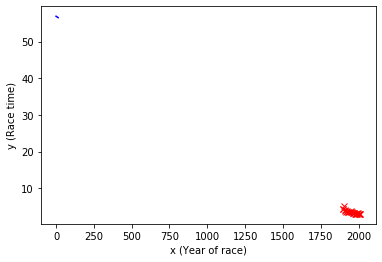

In [214]:
y_test = w0 + w1 * x_test
plot_fit(x_test, y_test, x, y)

### 4. Linear algebra solution

In lecture, we saw that it's possible to solve for the optimal weights $\mathbf{w}^\star$ analytically. The solution is
$$\mathbf{w}^* = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}$$
where
$$\mathbf{X} = \begin{pmatrix} 
        1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n 
    \end{pmatrix} 
  \quad \text{and} \quad 
  \mathbf{y} = \begin{pmatrix} 
          y_1 \\ y_2 \\ \vdots \\ y_n
      \end{pmatrix}
$$

We construct $\mathbf{X}$ in the code block below, remembering to include the $x_0 = 1$ column for the bias.

In [215]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[1.000e+00 1.896e+03]
 [1.000e+00 1.900e+03]
 [1.000e+00 1.904e+03]
 [1.000e+00 1.908e+03]
 [1.000e+00 1.912e+03]
 [1.000e+00 1.920e+03]
 [1.000e+00 1.924e+03]
 [1.000e+00 1.928e+03]
 [1.000e+00 1.932e+03]
 [1.000e+00 1.936e+03]
 [1.000e+00 1.948e+03]
 [1.000e+00 1.952e+03]
 [1.000e+00 1.956e+03]
 [1.000e+00 1.960e+03]
 [1.000e+00 1.964e+03]
 [1.000e+00 1.968e+03]
 [1.000e+00 1.972e+03]
 [1.000e+00 1.976e+03]
 [1.000e+00 1.980e+03]
 [1.000e+00 1.984e+03]
 [1.000e+00 1.988e+03]
 [1.000e+00 1.992e+03]
 [1.000e+00 1.996e+03]
 [1.000e+00 2.000e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.012e+03]]


Although we can express $\mathbf{w}^\star$ explicitly in terms of the matrix inverse $(\mathbf{X}^\top \mathbf{X})^{-1}$, this isn't an efficient way to compute $\mathbf{w}$ numerically. It is better instead to solve the following system of linear equations:
$$\mathbf{X}^\top\mathbf{X} \mathbf{w}^\star = \mathbf{X}^\top\mathbf{y}$$

This can be done in numpy using the command

In [216]:
np.linalg.solve?

which gives

In [217]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w)

[[ 2.88952457e+01]
 [-1.29806477e-02]]


Plotting this solution, as before:

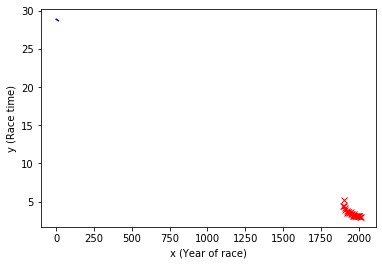

In [218]:
w0, w1 = w
y_test = w0 + w1 * x_test  
# another solution f_test = np.dot(x_test, w)
plot_fit(x_test,y_test, x, y)

You should verify that the sum of squared residuals $SSR(w_0, w_1)$, match or beats the earlier iterative result.

In [219]:
print(compute_SSR(x, y, w0, w1))

1.9799837689231614


###  5. Solving using scikit-learn

Now that you have a good understanding of what's going on under the hood, you can use the functionality in `sklearn` to solve linear regression problems you encounter in the future. Using the `LinearRegression` module, fitting a linear regression model becomes a one-liner as shown below.

In [220]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x, y)

The `LinearRegression` module provides access to the bias weight $w_0$ under the `intercept_` property

In [221]:
lr.intercept_

array([28.89524574])

and the non-bias weights under the `coef_` property

In [222]:
lr.coef_

array([[-0.01298065]])

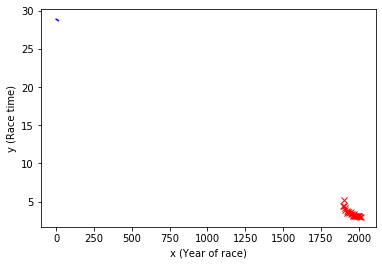

In [223]:
#y_test = lr.intercept_ + lr.coef_ * x_test
y_test = lr.predict(x_test)
plot_fit(x_test,y_test, x, y)

In [224]:
print(compute_SSR(x, y, lr.intercept_, lr.coef_))

1.9799837689231665


You should check that these results match the solution you obtained previously.

## Part B: Model Complexity and Regularization

This part will review overfitting, model selection and regularisation. Note that the lessons here apply equally to classification, however it's more convenient to visualise regression models, and they are also much simpler to fit to data.

**Discussion:** We will consider regression models of varying complexity, from a simple linear model to polynomial models of varying order.
Q1: Based on the Olympic marathon data, what order model do you think is going to perform the best? (*Hint*: In making your decision, think about the *interpolation* predictions for years between Olympics (e.g., 2015), and *extrapolations* into the future, e.g., 2016, 2020, 2040, etc?

## Polynomial Regression

Now we will consider a more complex polynomial function. Where before we had instances of the form,
$$\phi(\mathbf{x}) = [ 1~ x ]$$ 
now we will be using e.g., 
$$\phi(\mathbf{x}) = [ 1 ~x~ x^2~ x^3~ x^4]$$ 
for a quartic model. We will consider a range of polynomial models of different orders. 

To implement this we will use *basis functions* which provide a neat way of representing our data instances such that we can still use all the linear models to acheive learn a non-linear model. 

### Data Preparation

In [225]:
num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1890, 2016, num_pred_data)[:, None] # input locations for predictions
order = 4 # The polynomial order to use.
print ('Num of training samples: ',num_data)
print('Num of testing samples: ',num_pred_data)

Num of training samples:  27
Num of testing samples:  100


Now let's build the *basis* matrices $\Phi$ to represent the training data, where each column is raising the input year $X$ to various powers.

In [226]:
Phi = np.zeros((num_data, order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x**i
    Phi_pred[:, i:i+1] = x_pred**i

In [227]:
Phi

array([[1.00000000e+00, 1.89600000e+03, 3.59481600e+06, 6.81577114e+09,
        1.29227021e+13],
       [1.00000000e+00, 1.90000000e+03, 3.61000000e+06, 6.85900000e+09,
        1.30321000e+13],
       [1.00000000e+00, 1.90400000e+03, 3.62521600e+06, 6.90241126e+09,
        1.31421910e+13],
       [1.00000000e+00, 1.90800000e+03, 3.64046400e+06, 6.94600531e+09,
        1.32529781e+13],
       [1.00000000e+00, 1.91200000e+03, 3.65574400e+06, 6.98978253e+09,
        1.33644642e+13],
       [1.00000000e+00, 1.92000000e+03, 3.68640000e+06, 7.07788800e+09,
        1.35895450e+13],
       [1.00000000e+00, 1.92400000e+03, 3.70177600e+06, 7.12221702e+09,
        1.37031456e+13],
       [1.00000000e+00, 1.92800000e+03, 3.71718400e+06, 7.16673075e+09,
        1.38174569e+13],
       [1.00000000e+00, 1.93200000e+03, 3.73262400e+06, 7.21142957e+09,
        1.39324819e+13],
       [1.00000000e+00, 1.93600000e+03, 3.74809600e+06, 7.25631386e+09,
        1.40482236e+13],
       [1.00000000e+00, 1.9480

### Fitting the model

Now we can solve for the regression weights and make predictions both for the training data points, and the test data points. That involves solving the linear system given by

$$\Phi' \Phi \mathbf{w} = \Phi' \mathbf{y}$$

with respect to $\mathbf{w}$.

In [228]:
# solve the linear system
w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))

In [229]:
#use resulting vector to make predictions at the training points and test points
f = np.dot(Phi, w)
f_pred = np.dot(Phi_pred, w)

In [230]:
# compute the sum of squares error
SSR = ((y-f)**2).sum()

The error is: 1.0819


Text(0, 0.5, 'pace (min/km)')

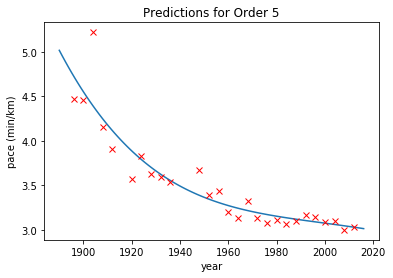

In [231]:
#Now we have the fit and the error, so let's plot the fit and the error.
print("The error is: %2.4f"%SSR)
plt.plot(x_pred, f_pred)
plt.plot(x, y, 'rx')
ax = plt.gca()
ax.set_title('Predictions for Order 5')
ax.set_xlabel('year')
ax.set_ylabel('pace (min/km)')

Now use the loop structure below to compute the error for different model orders.

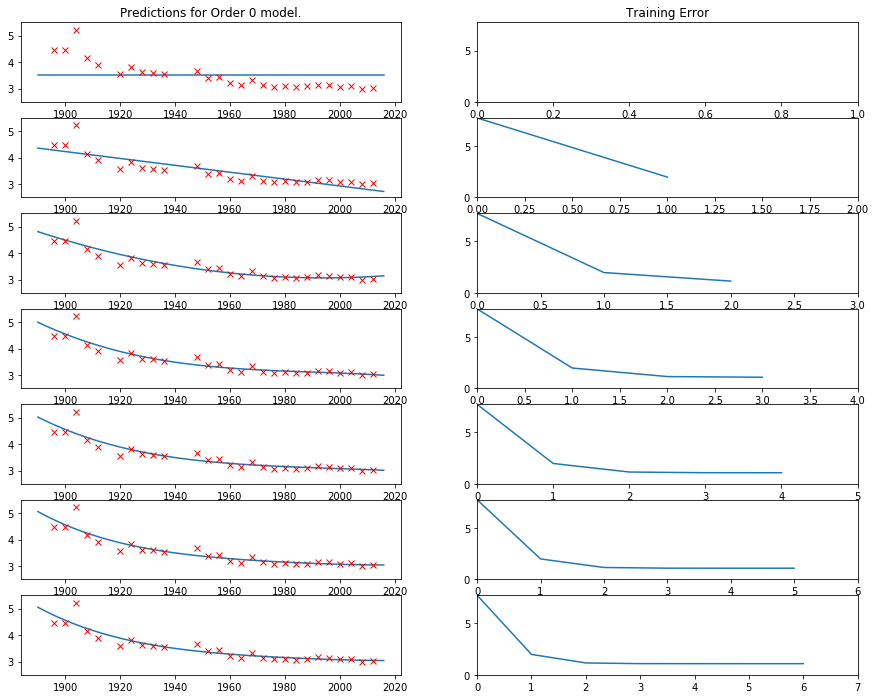

Training error list:  [7.721969486549555, 1.9799837689231596, 1.1505154038339402, 1.083870198472267, 1.0819480456914772, 1.080940174260707, 1.0808465103561862]


In [232]:
# import the time model to allow python to pause.
# import the IPython display module to clear the output.
import time
from IPython.display import clear_output

error_list = []
max_order = 6
#fig, axes = plt.subplots(nrows=1, ncols=2)
fig1=plt.figure(figsize=(15,2*max_order))
index=1

for order in range(0, max_order+1):
    # 1. build the basis set
    Phi = np.zeros((num_data, order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    for i in range(0, order+1):
        Phi[:, i:i+1] = x**i
        Phi_pred[:, i:i+1] = x_pred**i
    # 2. solve the linear system
    w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))

    # 3. make predictions at training and test points
    f = np.dot(Phi, w)
    f_pred = np.dot(Phi_pred, w)
    
    # 4. compute the error and append it to a list.
    SSR = ((y-f)**2).sum()    
    error_list.append(SSR)
    
    # 5. plot the predictions
    fig1.add_subplot(max_order+1,2,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim((2.5, 5.5))
    if (order ==0):
        plt.title('Predictions for Order ' + str(order) + ' model.')
    
    
    fig1.add_subplot(max_order+1,2,index+1)
    plt.plot(np.arange(0, order+1), np.asarray(error_list))
    plt.xlim((0, order+1))
    plt.ylim((0, np.max(error_list)))
    if (order ==0):
        plt.title('Training Error')
    index= index+2

plt.show()
#display(fig)
print('Training error list: ',error_list)

**Discussion:** Looks like a great fit. Does that mean we can stop here, our job is done? You might want to try an order 20 or higher model, also to see if the fits continue to improve with higher order models.

**Discussion:** What do you think might happen if we try to fit an order 100 model to this data? Is this even a reasonable thing to try?

## Hold Out Validation

The error we computed above is the training error. It doesn't assess the model's generalization ability, it only assesses how well it's performing on the given training data. 


In hold out validation, we keep back some of the training data for assessing generalization performance. In the case of time series prediction, it often makes sense to hold out the last few data points, in particular, when we are interested in *extrapolation*, i.e. predicting into the future given the past. To perform hold out validation, we first remove the hold out set. If we were interested in interpolation, we would hold out some random points. Here, because we are interested in extrapolation, we will hold out all points since 1980. 

In [233]:
# Create a training set
x_train = x
y_train = y
indices_hold_out = np.nonzero(x>1980)


x_train = np.delete(x, indices_hold_out)[:,None]
y_train = np.delete(y, indices_hold_out)[:,None]

# Create a hold out set
x_hold_out = x[indices_hold_out][:,None]
y_hold_out = y[indices_hold_out][:,None]


print ('Whole dataset size', x.shape)
print('Train split size: ', x_train.shape)
print('Test split size: ', x_hold_out.shape)

# Now use the training set and hold out set.

Whole dataset size (27, 1)
Train split size:  (18, 1)
Test split size:  (8, 1)


Now you have the training and hold out data, you should be able to use the code above to evaluate the model on the hold out data. Do this in the code block below.

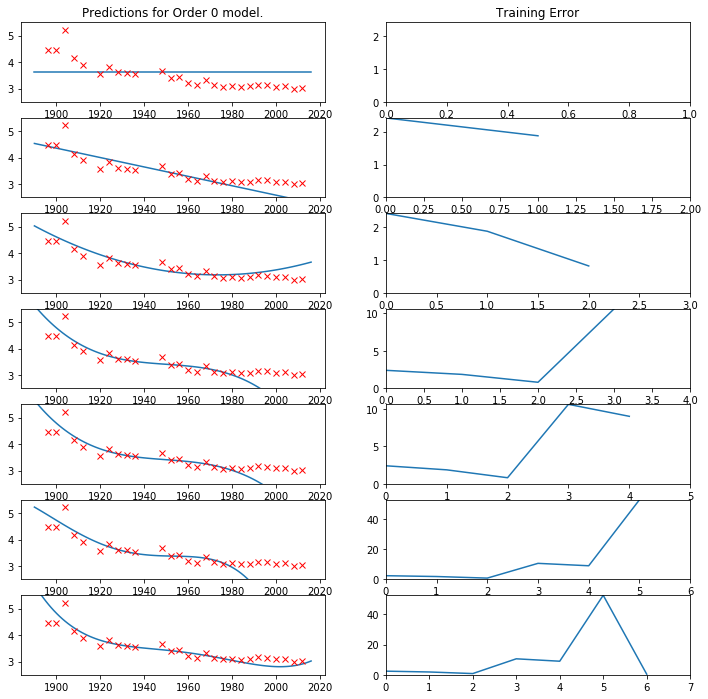

Holdout error list:  [2.41158654684046, 1.8706080480201295, 0.8185923524066352, 10.598856771771153, 9.00073461661839, 52.72680457062718, 0.4227279377936496]


In [234]:
error_list = []
max_order = 6
#fig, axes = plt.subplots(nrows=1, ncols=2)
fig1=plt.figure(figsize=(12,max_order*2))
index = 1
for order in range(0, max_order+1):
    # 1. build the basis set using x_train, x_hold_out
    Phi = np.zeros((x_train.shape[0], order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    Phi_hold_out = np.zeros((x_hold_out.shape[0], order+1))
    for i in range(0, order+1):
        Phi[:, i:i+1] = x_train**i
        Phi_hold_out[:, i:i+1] = x_hold_out**i
        Phi_pred[:, i:i+1] = x_pred**i
        
    # 2. solve the linear system
    w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y_train))

    # 3. make predictions at training and test points
    f = np.dot(Phi, w)
    f_hold_out = np.dot(Phi_hold_out, w)
    f_pred = np.dot(Phi_pred, w)
    
    # 4. compute the error and append it to a list.
    error = ((y_hold_out-f_hold_out)**2).sum()    
    error_list.append(error)
    
    # 5. plot the predictions
    fig1.add_subplot(max_order+1,2,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim((2.5, 5.5))
    if (order ==0):
        plt.title('Predictions for Order ' + str(order) + ' model.')
    
    
    fig1.add_subplot(max_order+1,2,index+1)
    plt.plot(np.arange(0, order+1), np.asarray(error_list))
    plt.xlim((0, order+1))
    plt.ylim((0, np.max(error_list)))
    if (order ==0):
        plt.title('Training Error')
    index= index+2

plt.show()
#display(fig)
print('Holdout error list: ', error_list)

**Discussion:** What is going on here? Does this match your earlier findings, or your intuition about which model order was most appropriate? Why isn't held-out error behaving the same as training error?

## Regularising the model, using ridge regression

A nice way to limit model complexity is *regularisation* where model parameters are penalised from moving to silly values. Here we consider silly as high magnitude, which means the model is getting overly confident. Can you explain why this might be a problem? 

For this exercise, we'll use a 6th order model, which you might consider much too powerful for this simple problem. As a first step, we'll preprocess the features to ensure they are all operating in a similar range. E.g., $2000^6 >> 2000^1$, which means the weights for the 6th order features will take on radically different values to the 1st order features. To correct for this, and allow regularisation with a single constant, we'll normalize (z-score) the columns of training Phi to have zero mean and unit standard deviation. This same transformation is also applied to the testing basis matrices.

In [235]:
order = 6
Phi = np.zeros((x_train.shape[0], order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
Phi_hold_out = np.zeros((x_hold_out.shape[0], order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x_train**i
    if i > 0:
        mean = Phi[:, i:i+1].mean()
        std = Phi[:, i:i+1].std()
        print(i,mean,std)
    else: # as the first column is constant, need to avoid divide by zero 
        mean = 0
        std = 1
    
    Phi[:, i:i+1] = (Phi[:, i:i+1] - mean) / std
    Phi_hold_out[:, i:i+1] = (x_hold_out**i - mean) / std
    Phi_pred[:, i:i+1] = (x_pred**i - mean) / std


1 1941.111111111111 25.50139187680392
2 3768562.6666666665 98948.39119909373
3 7317722151.111111 287984181.75614125
4 14211855356714.666 745126055055.9233
5 2.760578967150791e+16 1807656215163917.0
6 5.3631992369803985e+19 4.210433419688857e+18


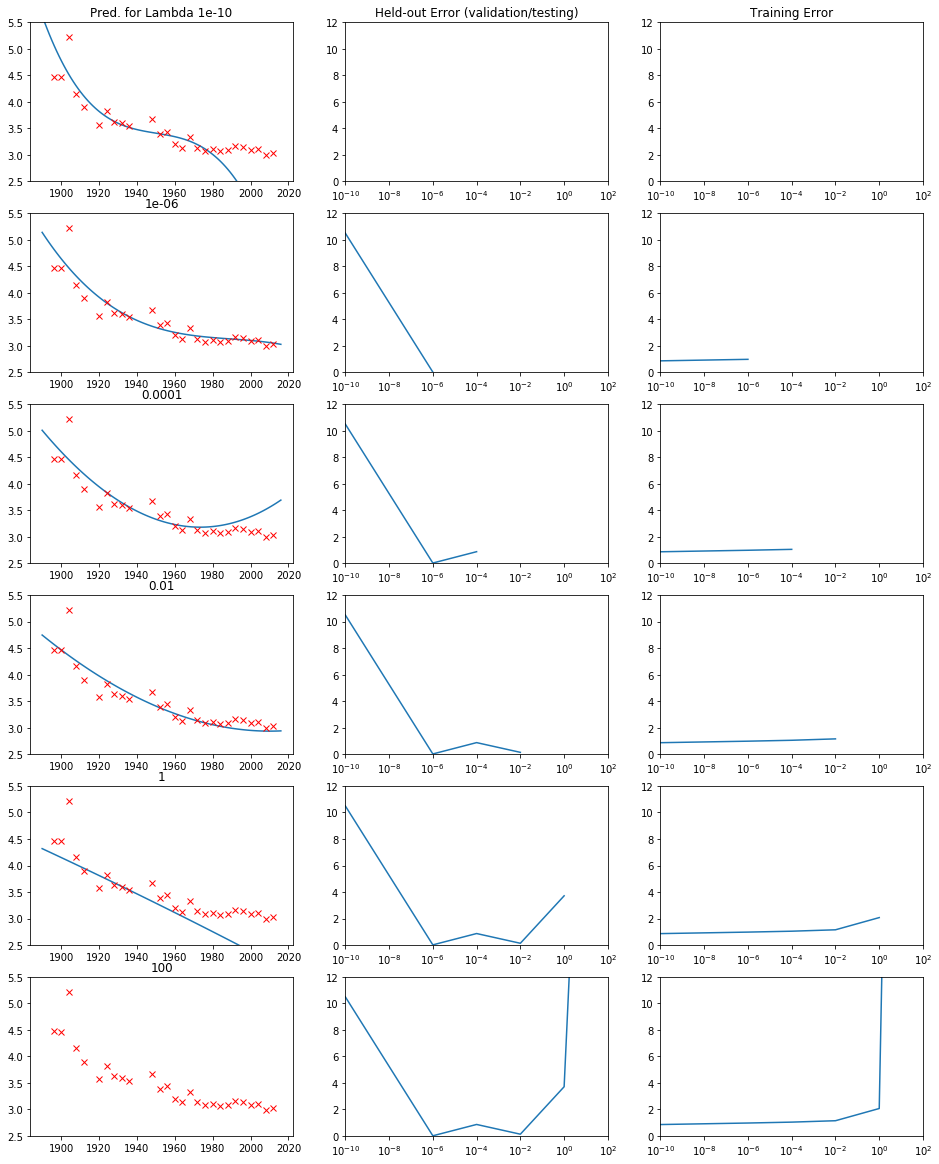

Holdout error list:  [10.496152078517872, 0.01599769679224831, 0.8706025062169136, 0.13597105123755332, 3.7156605721809033, 75.42605979437913]


In [236]:
#Next we'll perform training, trying out different values of the regularisation coefficient, lambda.
error_list = []
train_error_list = []
lambdas = [1e-10, 1e-6, 1e-4, 1e-2, 1, 100] 
order = 6
#fig, axes = plt.subplots(nrows=1, ncols=3)
fig1=plt.figure(figsize=(16,order*4))
index =1
for l, lamba in enumerate(lambdas):
    # 1. build the basis set using x_train, x_hold_out
    # done above
        
    # 2. solve the linear system
    w = np.linalg.solve(np.dot(Phi.T, Phi) + lamba * np.eye(order+1), np.dot(Phi.T, y_train))

    # 3. make predictions at training and test points
    f = np.dot(Phi, w)
    f_hold_out = np.dot(Phi_hold_out, w)
    f_pred = np.dot(Phi_pred, w)
    
    # 4. compute the error and append it to a list.
    error = ((y_hold_out-f_hold_out)**2).sum()    
    error_list.append(error)
    train_error = ((y_train-f)**2).sum()    
    train_error_list.append(train_error)
    
    # 5. plot the predictions
    fig1.add_subplot(len(lambdas)+1,3,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim(2.5, 5.5)
    if (l==0):
        plt.title('Pred. for Lambda ' + str(lamba))
    else: 
        plt.title(str(lamba))
        
    fig1.add_subplot(len(lambdas)+1,3,index+1)
    plt.plot(lambdas[:l+1], np.asarray(error_list))
    plt.xlim((min(lambdas), max(lambdas)))
    plt.xscale('log')
    plt.ylim(0, 12)
    if (l==0):
        plt.title('Held-out Error (validation/testing)')
    
    
    fig1.add_subplot(len(lambdas)+1,3,index+2)
    plt.plot(lambdas[:l+1], np.asarray(train_error_list))
    plt.xlim(min(lambdas), max(lambdas))
    plt.xscale('log')
    plt.ylim(0, 12)
    if (l == 0):
        plt.title('Training Error')
    index= index+3

plt.show()
#display(fig)
print('Holdout error list: ',error_list)

**Discussion:** What setting gives the best heldout performance? How does this relate to the training error, and can you describe whether you see evidence of overfitting or underfitting?

## Bonus: Manufacturing Dataset
Kaggle dataset: https://www.kaggle.com/vinicius150987/manufacturing-cost

Let's assume that you work as a consultant to a start-up company that was looking to develop a model to estimate the manufacturing cost (cost of goods sold) as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. the number of units sold. 

In [237]:
import pandas as pd
df = pd.read_csv('EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [238]:
#convert pandas dataframe to numpy array and reshape them into 2D matrices (to be used in LinearRegression sklearn model)
X=df['Number of Units'].to_numpy().reshape(-1,1)
Y=df['Manufacturing Cost'].to_numpy().reshape(-1,1)

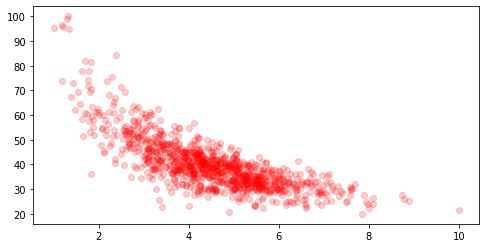

In [239]:
plt.figure(figsize=(8, 4))
plt.scatter(x=X, y=Y, alpha=0.2, color='red')
plt.show()

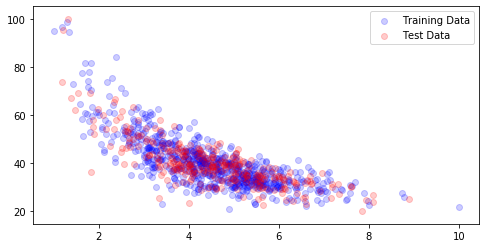

In [240]:
#Split the data into training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)
plt.figure(figsize=(8, 4))
plt.scatter(X_train, Y_train, label='Training Data', color='blue', alpha=0.2)
plt.scatter(X_test, Y_test, label='Test Data', color='red', alpha=0.2)
plt.legend()
plt.show()

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

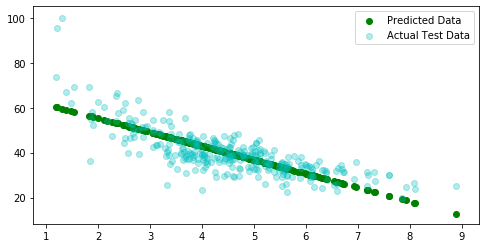

In [242]:
plt.figure(figsize=(8, 4))
prediction = lr.predict(X_test)
plt.scatter(X_test, prediction, label='Predicted Data', color = 'g')
plt.scatter(X_test, Y_test, label='Actual Test Data', color = 'c', alpha = 0.3)
plt.legend()
plt.show()

In [243]:
# compute the mean squared error (MSE)
MSE= mean_squared_error(Y_test,prediction)
MSE

43.24555436222249

Based on the plot and error, what do you think? Should we try higher order model?

Change *order* in the following code, to see if the fits continue to improve with higher order models.

32.54540946571352

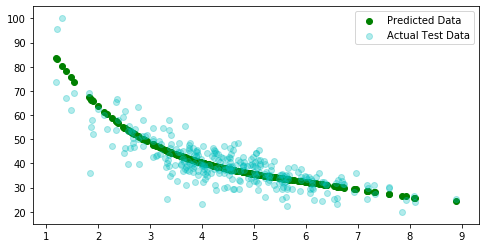

In [244]:
from sklearn.preprocessing import PolynomialFeatures


order= 4;
poly = PolynomialFeatures(order)
X_Transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_Transformed, Y_train)

plt.figure(figsize=(8, 4))
prediction = lr.predict(X_test_transformed)
plt.scatter(X_test, prediction, label='Predicted Data', color = 'g')
plt.scatter(X_test, Y_test, label='Actual Test Data', color = 'c', alpha = 0.3)
plt.legend()


# compute the mean squared error
MSE= mean_squared_error(Y_test,prediction)
MSE